In [1]:
import os

day=r"C:\Users\DELL\Desktop\Final_year_Project\images_masks\colormaps\daytime\daytime_images"
night=r"C:\Users\DELL\Desktop\Final_year_Project\images_masks\colormaps\night\new_night_images"
os.listdir(day)

['00054602-3bf57337.jpg',
 '00091078-59817bb0.jpg',
 '0010bf16-a457685b.jpg',
 '00495359-1d04dd8a.jpg',
 '0066b72f-974f6883.jpg',
 '006a7635-c42f9f97.jpg',
 '00a395fe-d60c0b47.jpg',
 '00a9cd6b-b39be004.jpg',
 '00ad8a92-c4851839.jpg',
 '00d79c0a-23bea078.jpg',
 '00d8944b-e157478b.jpg',
 '00de601c-858a8a8d.jpg',
 '00f7eac8-5193d600.jpg',
 '010fc651-19922861.jpg',
 '01118704-2d838d7f.jpg',
 '011d593a-89158b9d.jpg',
 '012e0351-723ac360.jpg',
 '014474aa-accf35e1.jpg',
 '01688cf2-237fbd49.jpg',
 '01818f85-6397dd75.jpg',
 '01a4933a-252e566a.jpg',
 '01c4035b-bcaeb067.jpg',
 '01c5cd64-6e208afd.jpg',
 '0204aad7-05dbee41.jpg',
 '02133057-fc70cc0e.jpg',
 '021c0ade-877a81e9.jpg',
 '023d0f3c-564e6d31.jpg',
 '0245bba2-838a71a5.jpg',
 '0248ab56-904b42ad.jpg',
 '026c7465-d54954fa.jpg',
 '027e72be-02d4782f.jpg',
 '029abf56-094a6f08.jpg',
 '02d3ac59-ada9555d.jpg',
 '02ddd956-1bee234c.jpg',
 '0311770a-42a9e854.jpg',
 '0335a578-bc537992.jpg',
 '033ae54d-46760e92.jpg',
 '035b1b38-07da7a0c.jpg',
 '035cbba8-1

In [2]:
!pip install tensorflow


In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

def load_and_resize_images_from_folder(folder_path, target_size=(256, 256)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            try:
                # Open, resize, and convert the image to RGB format
                with Image.open(img_path) as img:
                    img = img.convert('RGB')
                    img_resized = img.resize(target_size)
                    img_array = np.array(img_resized)
                    images.append(img_array)
            except Exception as e:
                print(f'Could not process {filename}: {e}')
    return np.array(images)

# Replace these paths with your actual paths
night_time_folder = night
day_time_folder = day
# Load images into separate NumPy arrays
nighttime_images = load_and_resize_images_from_folder(night)
daytime_images = load_and_resize_images_from_folder(day)


In [4]:
# Load and resize images into numpy arrays
target_size = (256, 266)  # Define the target size for resizing
night_time_images = load_and_resize_images_from_folder(night_time_folder, target_size=target_size)
day_time_images = load_and_resize_images_from_folder(day_time_folder, target_size=target_size)

# Function to split images into training and validation sets
def split_images(images, train_size=0.8):
    train_images, val_images = train_test_split(images, train_size=train_size, random_state=42)
    return train_images, val_images

# Split night time images
night_time_train, night_time_val = split_images(night_time_images)

# Split day time images
day_time_train, day_time_val = split_images(day_time_images)

# Create labels
night_time_train_labels = [0] * len(night_time_train)
night_time_val_labels = [0] * len(night_time_val)
day_time_train_labels = [1] * len(day_time_train)
day_time_val_labels = [1] * len(day_time_val)

# Combine the arrays and labels
train_images = np.concatenate((night_time_train, day_time_train), axis=0)
val_images = np.concatenate((night_time_val, day_time_val), axis=0)
train_labels = np.concatenate((night_time_train_labels, day_time_train_labels), axis=0)
val_labels = np.concatenate((night_time_val_labels, day_time_val_labels), axis=0)

# Preprocess images: scale pixel values
train_images = train_images / 255.0
val_images = val_images / 255.0

# Convert labels to one-hot encoding
num_classes = 2
train_labels = to_categorical(train_labels, num_classes=num_classes)
val_labels = to_categorical(val_labels, num_classes=num_classes)

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_images, val_labels)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8077 - loss: 0.5498 - val_accuracy: 0.8734 - val_loss: 0.3117
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 91s 943ms/step - accuracy: 0.8748 - loss: 0.3091 - val_accuracy: 0.8577 - val_loss: 0.3184
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 96s 992ms/step - accuracy: 0.8754 - loss: 0.3051 - val_accuracy: 0.8381 - val_loss: 0.4264
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 94s 975ms/step - accuracy: 0.8950 - loss: 0.2703 - val_accuracy: 0.8773 - val_loss: 0.2973
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 94s 974ms/step - accuracy: 0.9080 - loss: 0.2215 - val_accuracy: 0.8681 - val_loss: 0.3198
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 94s 980ms/step - accuracy: 0.9376 - loss: 0.1617 - val_accuracy: 0.8603 - val_loss: 0.3773
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9559 - loss: 0.1066 - val_accuracy: 0.8551 - val_loss: 0.4566
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9711 - loss: 0.0794 - val_acc

In [6]:
model_save_path = r'C:\Users\DELL\Desktop\Final_year_project\100_model.h5'
model.save(model_save_path)

In [7]:
model = tf.keras.models.load_model(model_save_path)
print(f'Model loaded from {model_save_path}')
pred=model.predict(val_images)

Model loaded from C:\Users\DELL\Desktop\Final_year_project\100_model.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step


In [8]:
pred_labels = np.argmax(pred, axis=1)

In [9]:
val_labels_=np.argmax(val_labels, axis=1)

In [10]:
pred_labels[0],val_labels_[0]

(0, 0)

Confusion matrix saved to confusion_matrix.csv


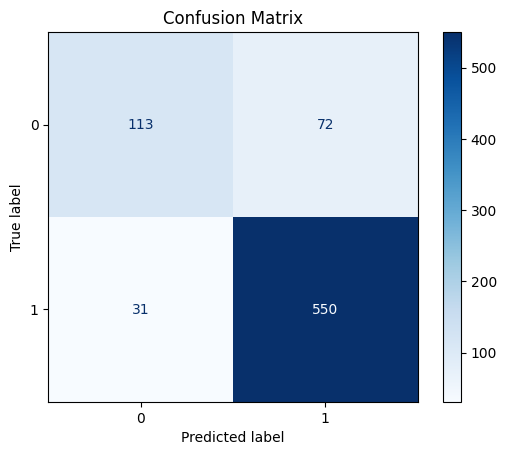

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example lists of predicted labels and true labels
pred_labels =pred_labels#Replace with your actual predicted labels
val_labels = val_labels_
# Compute the confusion matrix
cm = confusion_matrix(val_labels, pred_labels)

# Optionally, save the confusion matrix to a file
pd.DataFrame(cm).to_csv('confusion_matrix.csv', index=False)
print('Confusion matrix saved to confusion_matrix.csv')

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Confusion matrix saved to confusion_matrix.csv


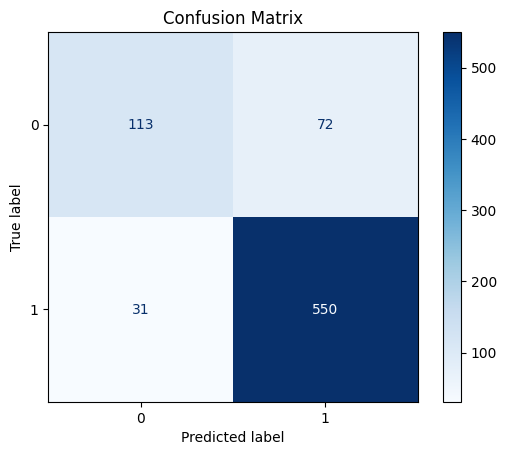

Class-wise accuracy: [0.61081081 0.94664372]
Class-wise accuracy saved to class_wise_accuracy.csv


In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming pred_labels and val_labels_ are already defined
# pred_labels = ...  # Replace with your actual predicted labels
# val_labels_ = ...  # Replace with your actual true labels

# Compute the confusion matrix
cm = confusion_matrix(val_labels_, pred_labels)

# Save the confusion matrix to a file
pd.DataFrame(cm).to_csv('confusion_matrix.csv', index=False)
print('Confusion matrix saved to confusion_matrix.csv')

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate class-wise accuracy
class_wise_accuracy = cm.diagonal() / cm.sum(axis=1)
print('Class-wise accuracy:', class_wise_accuracy)

# Save class-wise accuracy to a CSV file
class_accuracy_df = pd.DataFrame({'Class': np.arange(len(class_wise_accuracy)), 'Accuracy': class_wise_accuracy})
class_accuracy_df.to_csv('class_wise_accuracy.csv', index=False)
print('Class-wise accuracy saved to class_wise_accuracy.csv')